# Mines Nancy - Fall 2024 - Numerical Optimization
----
## TP2: descent methods for unconstrained optimization problems
### Part 1: gradient descent methods

In this notebook, we will explore first-order descent methods -- namely **gradient descent** to solve (unconstrained) optimization problems. The goals are:  
- to write your own gradient descent algorithm;
- investigate different step-size strategies (fixed size, optimal, and backtracking)
- compute convergence metrics to monitor the progress of the algorithm -- and deciding when to stop

Just like in TP1, practical implementation of the algorithms relies on classical Python libraries:
1. **NumPy**: For efficient numerical computations, matrix operations, and solving least-squares problems using built-in linear algebra functions.
2. **Matplotlib**: For visualizing the data and displaying / interpreting results.
3. **Scipy**: a NumPy-based python library for scientific computations. In particular, we we'll use some functions from ``scipy.optimize``.

### Running the Notebook
This notebook can be executed in the following environments:
- **Google Colab**: A convenient, cloud-based option that requires no setup. Simply open the notebook in Colab, and you're ready to run the code.
- **Locally**: You can run the notebook on your local machine using environments like **JupyterLab** or **Jupyter Notebook**. You can also run it directly in **Visual Studio Code** if you have the Jupyter extension. In all cases, ensure you have Python installed along with the required libraries, `NumPy` and `Matplotlib` and ``scipy``.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## First example: a quadratic function

Consider the following optimization problem
$$ \min_{\mathbf{x}\in \mathbb{R}^2} f(\mathbf{x})$$
where
$$f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top \mathbf{Q} \mathbf{x} - \mathbf{p}^\top \mathbf{x} \text{ with } \begin{cases} \mathbf{Q} = \begin{bmatrix} 1 & 0 \\ 0 & \eta\end{bmatrix}, \: \eta > 0\\
\mathbf{p} = \begin{bmatrix} 1\\1\end{bmatrix}\end{cases}$$

**Preliminary questions**
1. Recall the expression of $\nabla f(\mathbf{x})$.
2. What is a minimizer of this optimization problem? Is it unique?
3. Recall the principle of gradient descent using pseudo-code.

> write here your answers using markdown.

**Programming questions**
1. Create a function that returns the value of the objective function for a given vector $\mathbf{x} = [x_1, x_2]$, for $\eta = 5$.
2. Display the objective function on the grid $[-1, 1] \times [-1, 1]$, with, say 100 points on each axis. (check the functions ``np.meshgrid``, ``plt.pcolormesh``, ``plt.contour``, ``plt.contourf``). Comment the different graphical representations.
3. Gradient descent (*constant step-size*)
   1. write an algorithm that performs constant step-size gradient descent for a fixed number of iterations from a initial point $\mathbf{x}_0$.
   2. display such iterations on top of the cost function.
   3. propose several metrics to assess the progress (or convergence) of the algorithm as the iterations goes. Display them as a function of iterations (using ``plt.semilogy``)
   4. modify your algorithm to stop whenever one of these metrics goes below a prescribed threshold (fixed in advance).
   5. Using numerical experiments, comment on how to choose a constant step size.
4. Gradient descent (*optimal step-size*)
   1. recall the principle of the optimal stepsize strategy.
   2. adapt the previous algorithm to compute the optimal stepsize at each iteration.
   3. display the evolution of performance metrics along iterations.

5. Compare both strategies in terms of convergence speed and comment. How does the parameter $\eta$ influences algorithmic properties?

In [5]:
# question 1
def obj_f(x1,x2,eta):
  return 0.5*(x1**2+eta*x2**2)-x1-x2
print(obj_f(1,1,5))

1.0


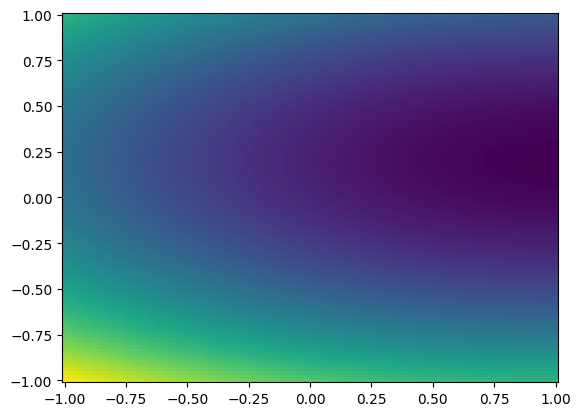

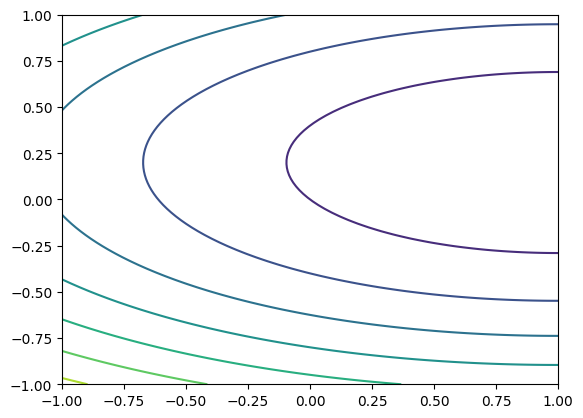

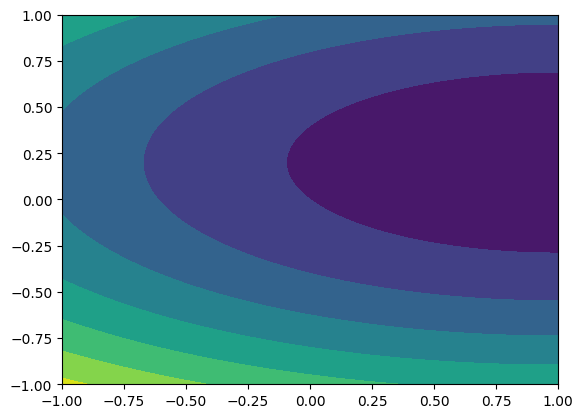

In [6]:
# question 2
N=100
x1=np.linspace(-1,1,N)
x2=np.linspace(-1,1,N)
X, Y=np.meshgrid(x1,x2)
#with pcolormesh
plt.figure()
plt.pcolormesh(X,Y,obj_f(X,Y,5))

#with contour
plt.figure()
plt.contour(X,Y,obj_f(X,Y,5))

#with contourf:
plt.figure()
plt.contourf(X,Y,obj_f(X,Y,5))



Stopping due to insufficient increase in iterates.
Gradient descent stops after 114 iterations.
trying stepsize 0.05
Gradient descent stops after 201 iterations.
trying stepsize 0.1
Stopping due to insufficient increase in iterates.
Gradient descent stops after 114 iterations.
trying stepsize 0.2
Stopping due to insufficient increase in iterates.
Gradient descent stops after 58 iterations.
trying stepsize 0.4
Gradient descent stops after 201 iterations.


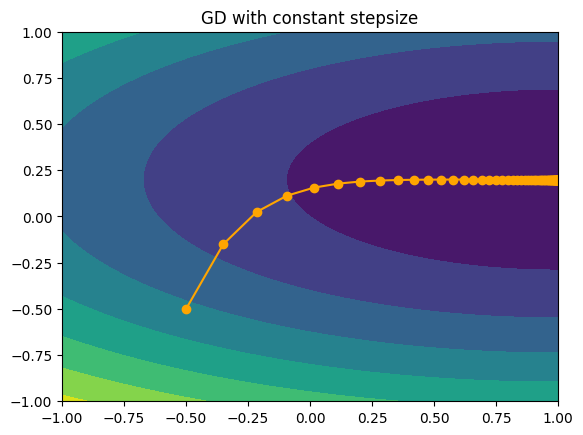

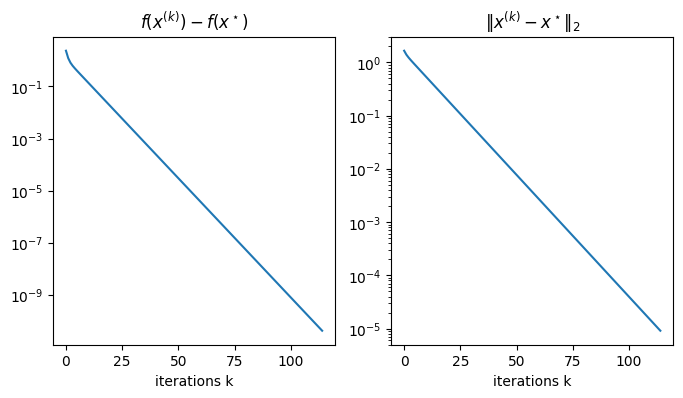

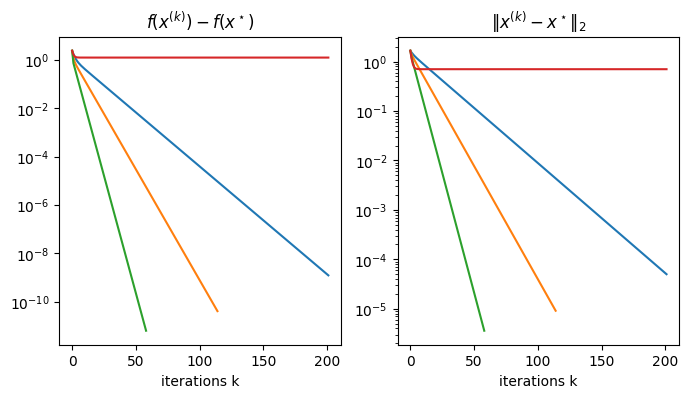

In [7]:
# question 3
def grad(x,eta):
  grad = np.array([x[0] - 1, eta*x[1] - 1])
  return grad
def gradient_descent_fixed_stepsize(x0, step, nitermax=100, tol=1e-5):
  # list of iterates
    xks = [x0]

    # init metrics
    cost_vals = [obj_f(x0[0], x0[1],5)] # list of cost values

    k=0
    exitCriterion = False
    while (exitCriterion is False) and (k <= nitermax):
        xk = xks[k]
        xk1 = xk - step*grad(xk,5)

        # compute metrics
        cost_vals.append(obj_f(xk1[0], xk1[1],5))

        incr = np.linalg.norm(xk1-xk)/np.linalg.norm(xk1)
        if incr < tol:
            exitCriterion = True
            print("Stopping due to insufficient increase in iterates.")

        # add new iterate
        xks.append(xk1)
        k+=1
    print("Gradient descent stops after "+str(k)+" iterations.")
    return np.array(xks), np.array(cost_vals)
x0 = np.array([-.5, -.5])
xks, cost_vals = gradient_descent_fixed_stepsize(x0, 0.1, nitermax=200, tol=1e-6)

plt.figure()
plt.contourf(X,Y,obj_f(X,Y,5))
plt.plot(xks[:,0],xks[:,1],color='orange',marker='o')
plt.title('GD with constant stepsize')
fopt = obj_f(1, 1/5,5) # optimal value of f
xopt = np.array([1, 1/5]) # minimizer

# precompute distance of iterates to minimizer
dist_minimizer = np.linalg.norm(xks - xopt, axis=1)
#tracage des diffrentes metriques et visualisation de la convergence pour chacune d'elle
fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(8, 4))
ax[0].semilogy(cost_vals-fopt)
ax[0].set_xlabel('iterations k')
ax[0].set_title(r'$f(x^{(k)}) - f(x^\star)$')

ax[1].semilogy(dist_minimizer)
ax[1].set_xlabel('iterations k')
ax[1].set_title(r'$\Vert x^{(k)} - x^\star\Vert_2$');
steps = [0.05, 0.1, 0.2, 0.4]


fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(8, 4))
for step in steps:
    print('trying stepsize '+str(step))
    xks, cost_vals = gradient_descent_fixed_stepsize(x0, step, nitermax=200, tol=1e-6)

    dist_minimizer = np.linalg.norm(xks - xopt, axis=1)


    ax[0].semilogy(cost_vals-fopt)
    ax[0].set_xlabel('iterations k')
    ax[0].set_title(r'$f(x^{(k)}) - f(x^\star)$')

    ax[1].semilogy(dist_minimizer, label=step)
    ax[1].set_xlabel('iterations k')
    ax[1].set_title(r'$\Vert x^{(k)} - x^\star\Vert_2$');


Stopping due to insufficient increase in iterates.
Gradient descent stops after 25 iterations.


Text(0.5, 1.0, 'GD with optimal stepsize')

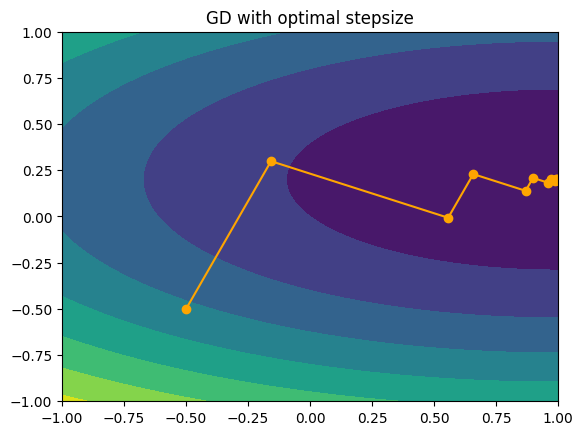

In [8]:
# question 4


fig.legend(title='stepsize');
def _cost_step(step, xk=np.zeros(2)):
    '''utility function'''
    xk1 = xk - step*grad(xk,5)
    return obj_f(xk1[0], xk1[1],5)

def gradient_descent_optimal_stepsize(x0, nitermax=100, tol=1e-5):
  # list of iterates
    xks = [x0]

    # init metrics
    cost_vals = [obj_f(x0[0], x0[1],5)] # list of cost values

    k=0
    exitCriterion = False
    while (exitCriterion is False) and (k <= nitermax):
        xk = xks[k]
        sol = sp.optimize.minimize_scalar(_cost_step, args=xk)
        xk1 = xk - sol.x*grad(xk,5)

        # compute metrics
        cost_vals.append(obj_f(xk1[0], xk1[1],5))

        incr = np.linalg.norm(xk1-xk)/np.linalg.norm(xk1)
        if incr < tol:
            exitCriterion = True
            print("Stopping due to insufficient increase in iterates.")

        # add new iterate
        xks.append(xk1)
        k+=1
    print("Gradient descent stops after "+str(k)+" iterations.")
    return np.array(xks), np.array(cost_vals)
x0 = np.array([-.5, -.5])
xks, cost_vals = gradient_descent_optimal_stepsize(x0, nitermax=200, tol=1e-6)

plt.figure()
plt.contourf(X,Y,obj_f(X,Y,5))
plt.plot(xks[:,0],xks[:,1],color='orange',marker='o')
plt.title('GD with optimal stepsize')


Stopping due to insufficient increase in iterates.
Gradient descent stops after 79 iterations.
Stopping due to insufficient increase in iterates.
Gradient descent stops after 21 iterations.


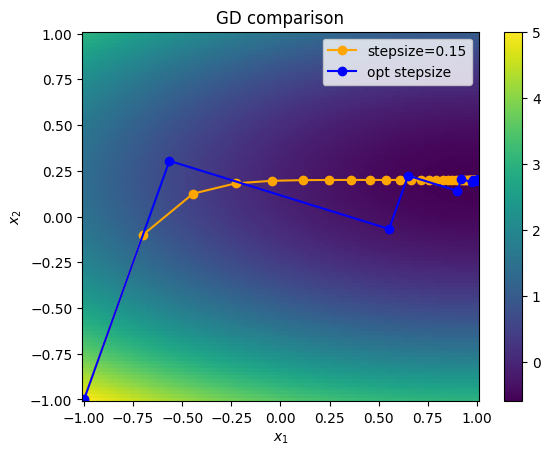

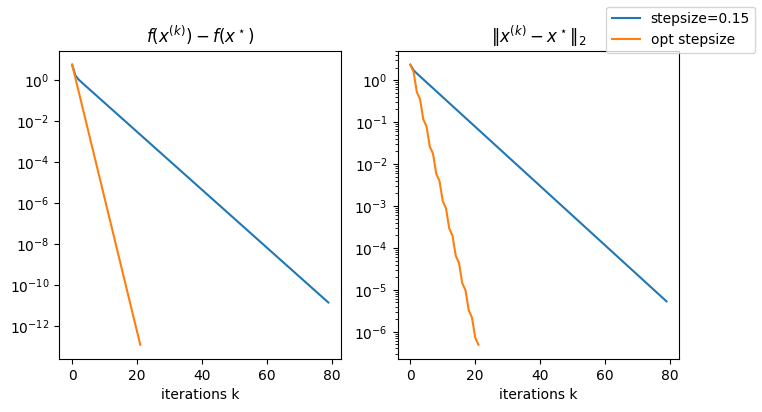

In [9]:
# question 5
# compare the different approaches - one with fixed stepsize and the other with optimal stepsize
fopt = obj_f(1, 1/5,5) # optimal value of f
xopt = np.array([1, 1/5]) # minimizer

x0 = np.array([-1, -1])
step = 0.15
xks, cost_vals = gradient_descent_fixed_stepsize(x0, step, nitermax=200, tol=1e-6)
xks_opt, cost_vals_opt = gradient_descent_optimal_stepsize(x0, nitermax=200, tol=1e-6)

dist = np.linalg.norm(xks - xopt, axis=1)
dist_opt = np.linalg.norm(xks_opt - xopt, axis=1)
# display on contour plot

plt.figure()
plt.pcolormesh(X, Y, obj_f(X,Y,5))
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.plot(xks[:, 0], xks[:, 1], color='orange', marker='o', label='stepsize='+str(step))
plt.plot(xks_opt[:, 0], xks_opt[:, 1], color='blue', marker='o', label='opt stepsize')
plt.legend()
plt.title('GD comparison')
# comparison
fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(8, 4))
ax[0].semilogy(cost_vals-fopt)
ax[0].semilogy(cost_vals_opt-fopt)
ax[0].set_xlabel('iterations k')
ax[0].set_title(r'$f(x^{(k)}) - f(x^\star)$')

ax[1].semilogy(dist, label='stepsize='+str(step))
ax[1].semilogy(dist_opt, label='opt stepsize')
ax[1].set_xlabel('iterations k')
ax[1].set_title(r'$\Vert x^{(k)} - x^\star\Vert_2$');
fig.legend()
#gradient decent pour un pas constant est moins performant que la descente der gradient avec un pas optimal

### Second example: a non-quadratic function
Example from Boyd and Vanderberghe.

Consider the optimization problem
$$ \min_{x_1, x_2} f(x_1, x_2)$$
where
$$f(x_1, x_2)= e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$$

In this example, we'll implement the backtracking method seen in class.

**Preliminary questions**
1. Compute the expression of $\nabla f(\mathbf{x})$.
2. Is the problem convex? Comment the existence and uniqueness of solutions to this optimization problem.



> write here your answers using markdown.

**Programming questions**
1. Create a function that returns the value of the objective function for a given vector $\mathbf{x} = [x_1, x_2]$.
2. Display the objective function on the grid $[-2, 0.5] \times [-0.5, 0.5]$, with, say 100 points on each axis.
3. Gradient descent (*constant step-size* and *optimal step size*)
   1. Following the quadratic example, write a gradient stepsize algorithm for this problem.
   2. Write a second algorithm with optimal step size selection at each iteration. Do not try to compute the optimal step analytically; rather, look at the function ``scipy.optimize.minimize_scalar`` to compute the step numerically.

4. Gradient descent (*backtracking*)
   1. Recall the principle of backtracking using pseudocode.
   2. For the first gradient descent iteration, implement the backtracking procedure seen in class for arbitrary parameters $(s, \eta)$.
   3. How does the amount of backtracks varies as parameters $(s, \eta)$ are changed?
   4. Incorporate the backtracking strategy in the gradient descent algorithm. Add a counter that tracks the number of backtracks in the algorithm and monitor this information.
5. Compare all three approaches trough selected graphical plots.

In [10]:
# Question 1
def obj(x1,x2):
  return np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)

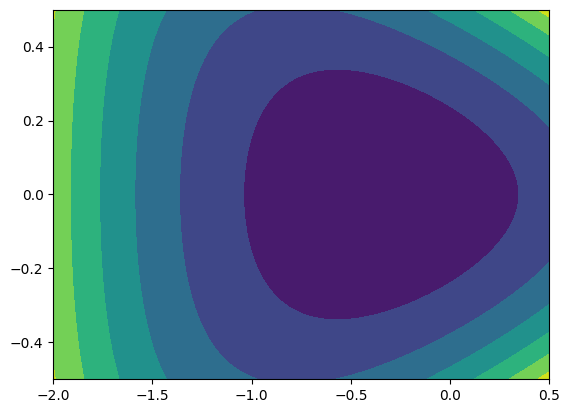

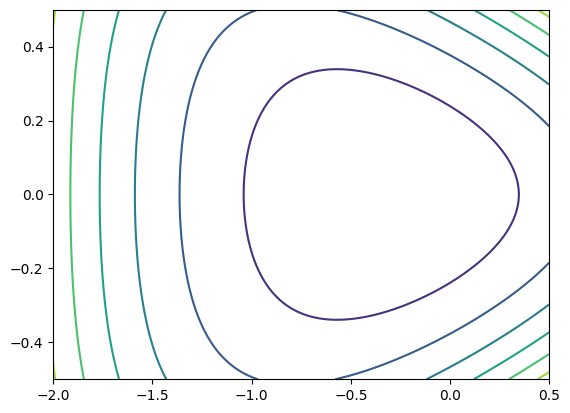

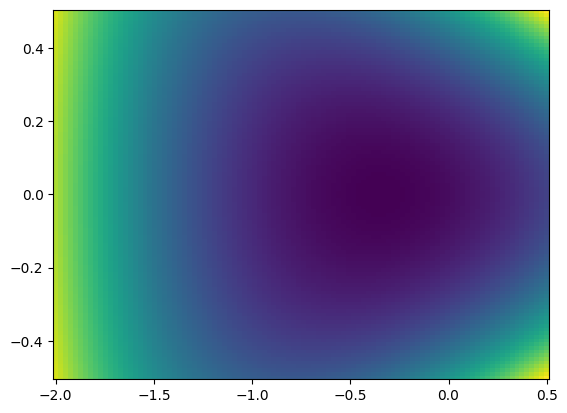

In [11]:
# Question 2
N=100
l1=np.linspace(-2,0.5,N)
l2=np.linspace(-0.5,0.5,N)
x1,x2=np.meshgrid(l1,l2)
#tracage :
plt.figure()
plt.contourf(x1,x2,obj(x1,x2))

plt.figure()
plt.contour(x1,x2,obj(x1,x2))

plt.figure()
plt.pcolormesh(x1,x2,obj(x1,x2))


Stopping due to insufficient increase in iterates.
Gradient descent stops after 15 iterations.


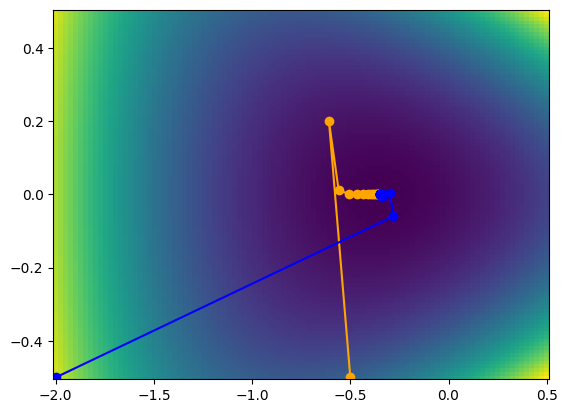

In [25]:
# Question 3
def grad2(x1,x2):
  return np.array([np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)-np.exp(-x1-0.1),3*np.exp(x1+3*x2-0.1)-3*np.exp(x1-3*x2-0.1)])
def gradient_descent_fixed_stepsize2(x0, step, nitermax=100, tol=1e-5):
    xks = [x0]

    # init metrics
    cost_vals = [obj(x0[0], x0[1])] # list of cost values

    k=0
    exitCriterion = False
    while (exitCriterion is False) and (k <= nitermax):
        xk = xks[k]
        xk1 = xk - step*grad(xk[0],xk[1])

        # compute metrics
        cost_vals.append(obj(xk1[0], xk1[1]))

        incr = np.linalg.norm(xk1-xk)/np.linalg.norm(xk1)
        if incr < tol:
            exitCriterion = True


        # add new iterate
        xks.append(xk1)
        k+=1

    return np.array(xks), np.array(cost_vals)
x0 = np.array([-.5, -.5])
xks, cost_vals = gradient_descent_fixed_stepsize2(x0, 0.1, nitermax=200, tol=1e-6)


def _cost_step2(step, xk=np.zeros(2)):
    '''utility function'''
    xk1 = xk - step*grad(xk[0],xk[1])
    return obj_f(xk1[0], xk1[1])

def _cost_step2(step, xk=np.zeros(2)):
    '''utility function'''
    xk1 = xk - step*grad(xk[0],xk[1])
    return obj(xk1[0], xk1[1])

def gradient_descent_optimal_stepsize2(x0, nitermax=100, tol=1e-5):
  # list of iterates
    xks = [x0]

    # init metrics
    cost_vals = [obj(x0[0], x0[1])] # list of cost values

    k=0
    exitCriterion = False
    while (exitCriterion is False) and (k <= nitermax):
        xk = xks[k]
        sol = sp.optimize.minimize_scalar(_cost_step2, args=xk)
        xk1 = xk - sol.x*grad2(xk[0],xk[1])

        # compute metrics
        cost_vals.append(obj_f(xk1[0], xk1[1],5))

        incr = np.linalg.norm(xk1-xk)/np.linalg.norm(xk1)
        if incr < tol:
            exitCriterion = True
            print("Stopping due to insufficient increase in iterates.")

        # add new iterate
        xks.append(xk1)
        k+=1
    print("Gradient descent stops after "+str(k)+" iterations.")
    return np.array(xks), np.array(cost_vals)

x0 = np.array([-2, -0.5])
xks2, cost_vals = gradient_descent_optimal_stepsize2(x0, nitermax=200, tol=1e-6)
plt.figure()
plt.pcolormesh(x1,x2,obj(x1,x2))
plt.plot(xks[:,0],xks[:,1],color='orange',marker='o')
plt.plot(xks2[:,0],xks2[:,1],color='blue',marker='o')


In [ ]:
# Question 4
#backtracking



In [ ]:
# Question 5

### Part 2: second-order descent methods

Consider again the second optimization problem, i.e.,

$$ \min_{x_1, x_2} f(x_1, x_2)$$
where
$$f(x_1, x_2)= e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$$

**Preliminary questions**
1. compute the Hessian of $f$
2. using pseudo-code, recall the principle of Newton methods and quasi-Newton methods.


> write here your answers using markdown.

**Programming questions**
1. Implement Newton's method for this problem.
2. Implement the BFGS algorithm for this problem. For the first iteration, use $B_0 = \nabla^2 f(x^{(0)})$ to initialize the method.
3. Compare gradient descent, Newton's algorithm and BFGS through numerical experiments. Evaluate convergence speed, numerical complexity and timings.

In [ ]:
# Question 1

In [ ]:
# Question 2

In [ ]:
# Question 3